# Predict Loan Eligibility for Dream Housing Finance company

- This classification problem aims to predict whether Dream housing finance Company (DHFCo) customers loan application would be approved or not. 
- The customer first applies for home loan and after that company validates the customer eligibility for loan.
- DHFCo wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.


# Hypothesis generation
This process involves understanding the problem and finding possible factors that might impact the problem.
- Salary: applicants with high income should have more chances of loan approval.
- Previous history: applicants who have repaid their debts have higher chances of loan approval
- Loan amount: the loan amount applied for will determine the approval sucesss. The less the amount, 
  the higher the chances of approval.
- Loan term: the less time period and less loan amount the higher the chances of loan approval
- Equated monthly installments(EMI): The lesser the agreed amount of monthly payments, the higher the chances of loan approval

In [1]:
# Loading packages

import pandas as pd
import numpy as np                # for mathematical calcualtions
import seaborn as sns             # for data visualisation
import plotly.express as px       # for data visualisation
import matplotlib.pyplot as plt   # for plotting graphs
%matplotlib inline
import warnings                   # to ignore any warnings
warnings.filterwarnings('ignore')

# Reading data
- Data consists of two csv files: train and test files. 
- The train file for training the model and test file for predicting the target variable, 'Loan_status'.


In [2]:
train = pd.read_csv('/Users/asumankabugo/Desktop/train-file.csv')
test = pd.read_csv('/Users/asumankabugo/Desktop/test-file.csv')

In [3]:
# lets make a copy of each csv file so that we dont loose the original datasets
train_original = train.copy()
test_original = test.copy()

# Understanding data
- We will check the features in the data 
- Then check their data types.

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The train dataset contains 12 variables with target variable, 'loan_status'. Lets check for test dataset.

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The test dataset contains 11 similar variables to train dataset except the target variable. Therefore we will use the train dataset to predict 'loan_status'.

Data types for train dataset

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can observe that there are three data types; 
- object indicating categorical variables.
- float64 indicating variables with decimal values involved. They can be numerical variables.
- int64 indicating integer values.

In [9]:
#shape of train dataset.
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in the test dataset.

# Univariate analysis
- We will analyse each variable individually
- Bar plots will be used to calculate the number of each category in  categorical features
- Probability density plots will be used to determine the distribution in numerical features.

Target variabl, Loan_Status 
As its a categorical variable, lets look at its frequency table, percentage distribution and bar plot. The frequncy will show us the count of each category in that variable

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#setting normalize to TRUE will give us the proportion instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

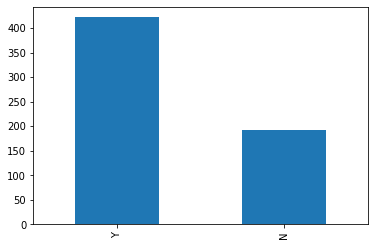

In [12]:
train['Loan_Status'].value_counts().plot.bar()

The output indicate a loan 422(around 69%) were approved out of 614 applicants.

Now lets visualise each variable separately. We have three types of variables:Categorical, numerical and ordinal.
- Categorical variables include Gender, Married, Loan_Status, Self_Employed, and Credit_History.
- Numerical variables include ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.
- Ordinal variables include Dependants, Property_Area, and Eduaction.

# Independent Categorical variables

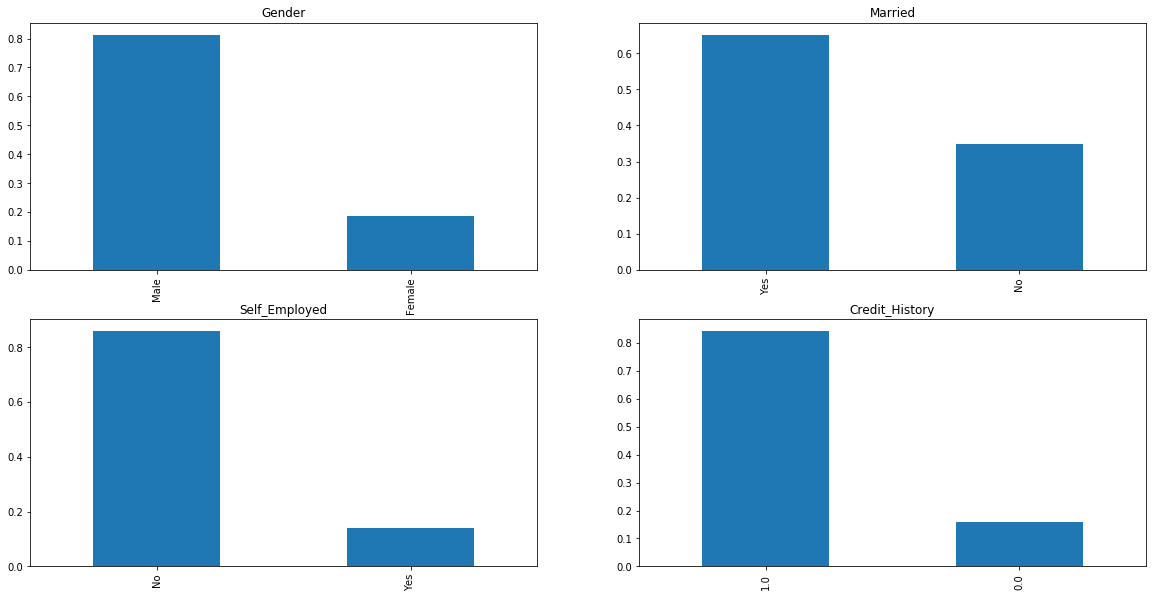

In [13]:
plt.figure(figsize = (20,10))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Gender')

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Married')

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Credit_History')

plt.show()

It can be understood from the above plots that:
- 80% of the applicants are male and 20% are female
- Around 65% of the applicants are Married
- Around 15% of the applicants are Self_Employed
- Around 86% of the applicants paid back the loan


# Independent Ordinal variables
- Dependents
- Property_Area
- Education

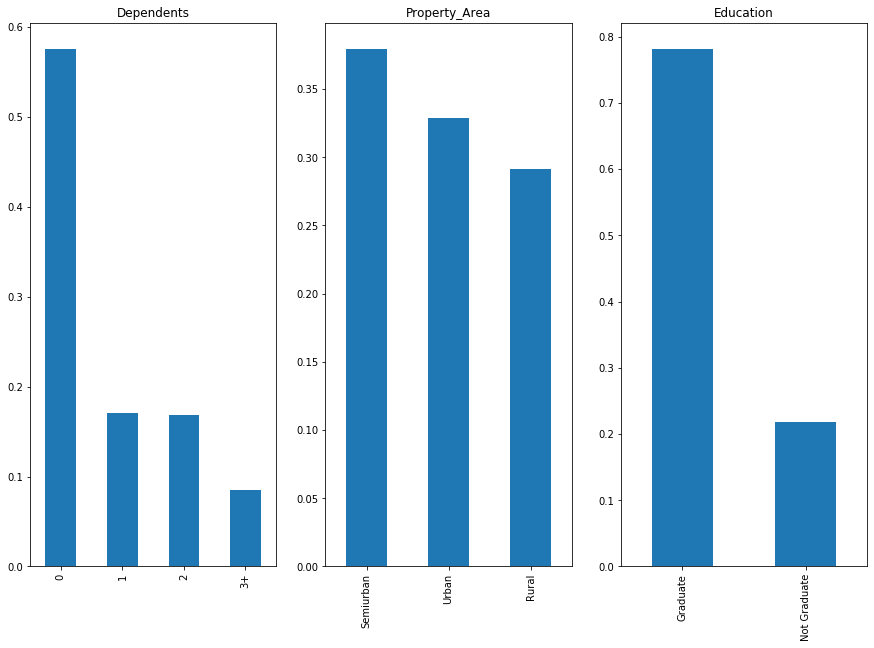

In [14]:
plt.figure(figsize = (15,10))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize= (15,10), title = 'Dependents')

plt.subplot(132)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize= (15,10), title = 'Property_Area')

plt.subplot(133)
train['Education'].value_counts(normalize=True).plot.bar(figsize= (15,10), title = 'Education')

plt.show()

It can be seen that:
- Most of the applicants have no depedents
- Most of the applicants live in semiurban areas
- Around 78% of the applicants are graduates.

# Independent Numerical  variables
- ApplicantIncome 
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term.

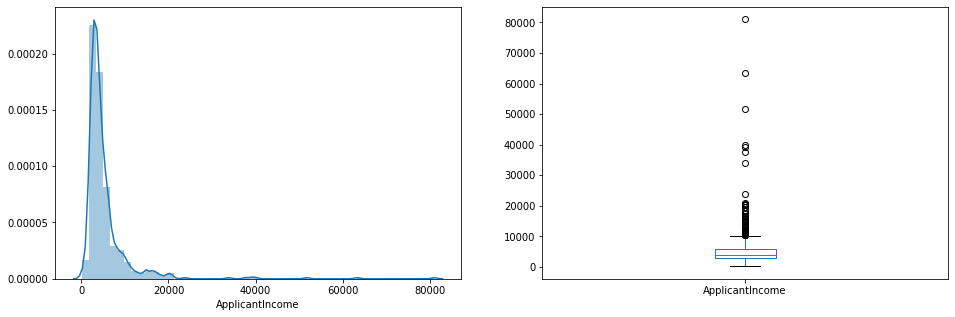

In [15]:
# ApplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


It can be observed that the distribution of income leans towards the left, ain indication of not normally distributed data.
we try to make it normal which will work better for our algorithm.
The box plot confirms the presence of outliers. This can be attributed to income disparity among the society. Part of this 
can be driven by education levels. Lets segregate them by Education. 

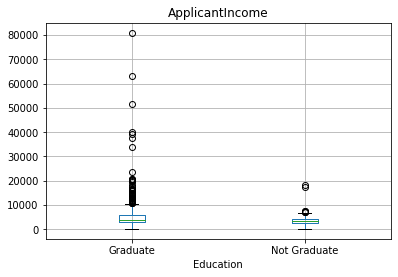

In [16]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("");

It can be seen that there are a higher number of graduate applicants with high incomes as outliers

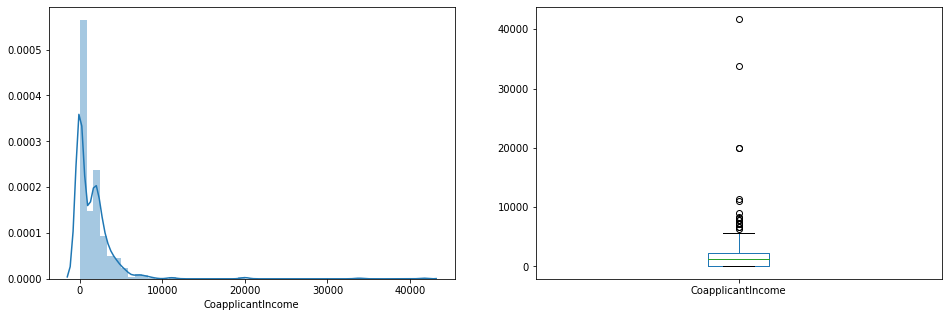

In [17]:
#Coapplicant income distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be seen that most Coaaplicant income ranges from 0 to 5000 and the data leans to the left an 
indication of data not normally distributed.


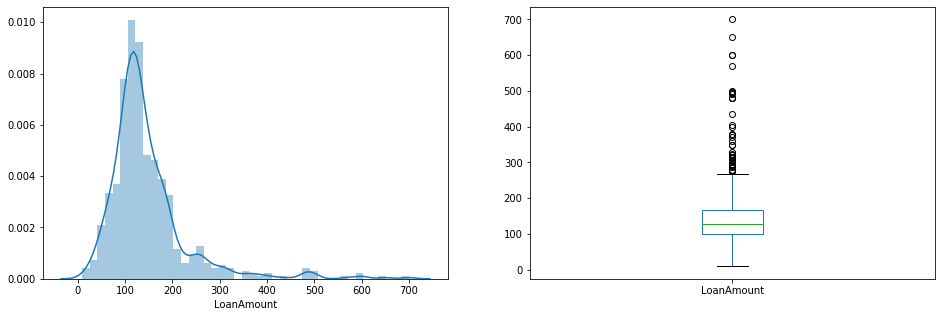

In [18]:
#distribution of LoanAmount
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We can see that the data is fairly distributed and the boxplot confirms presence of outliers which will be dealt with later 

# Bivariate analysis
In this section, we will visualise how each variable correlates with the target variable Loan_Status. The analysis will test the hypothesis we created at the start. We will visualise all the variables in relation to the target variable, Loan_Status.

# Independent categorical and Ordinal variables v Loan_Status(target variable)
To find the relationship between each independent categorical variable and the target variable, Loan_Status, we will use a stacked barplot which will show us the proportion of approved and unapproved loans

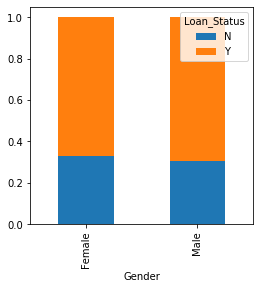

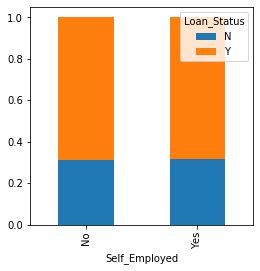

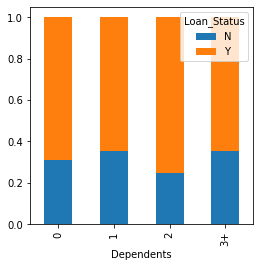

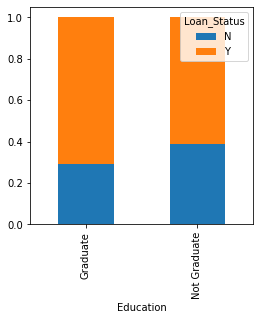

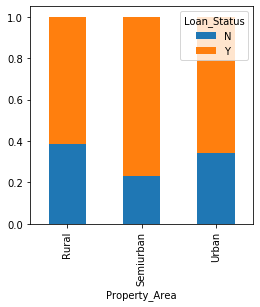

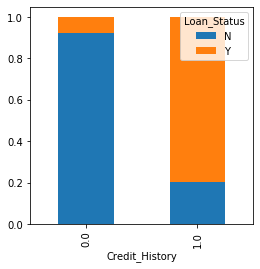

In [19]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4));

It can be inferred from the above plots that:
- the proportion of male and female applicants are more less similar.
- there is nothing to take from Self_Employed and Loan_Status.
- the distribution of dependents 1 and 3+ is similar across both categories of Loan_Status, however, applicants with 2 dependents are higher for approved loans.
- the proportion of graduate applicants are higher for approved loans.
- applicants living in semiurban areas have loans approved more than anywhere else.
- applicants with Credit history as 1 are more likely to have loans approved.

# Numerical Independent variables vs Loan_Status(target variable)
ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.
- We will try to find the mean income for the applicants that has been approved vs the mean income that has been approved.

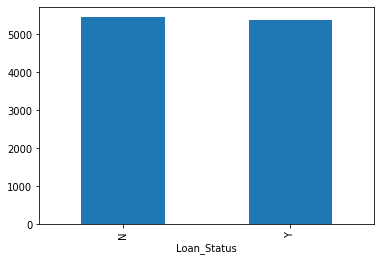

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

We see no change in the mean income  of the applicants on the y-axis. Therefore, we apply bins for applicants income 
variably based on the values in it and anlyse the corresponding loan status for each bin.

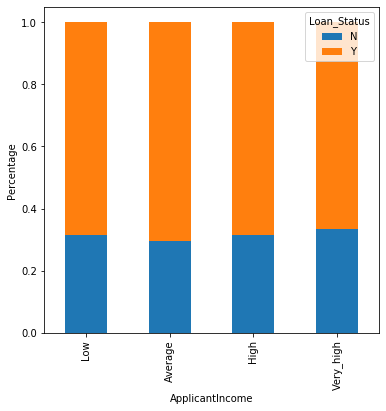

In [21]:
bins=[0, 2500, 4000, 6000, 81000] 
group = ['Low', 'Average','High', 'Very_high']
train['Income_bin']= pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

It can be seen that the applicant income does not affect the chances of approving a loan which contradicts our hypothesis 
in which we assummed that the higher the income the higher the chances of loan approval.

Lets analyse Coapplicant income and the loan amount in the same manner

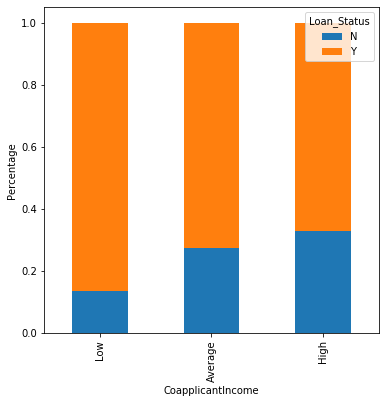

In [22]:
bins=[0, 1000, 3000, 43000] 
group = ['Low', 'Average','High']
train['Coapplicant_Income_bin']= pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

It shows that if the Coapplicant's income is less, the chances of loan approval are high. This seems not right. This 
is becuase the applicant has no coapplicant therefore the coapplicant income is 0 hence the loan approval doesnt depend
on it. To solve this, we will create a new variable by combining the applicants and coapplicants income to visualise
the the combined effect of income on laon approval.

Lets combine the applicant income and coapplicant income and see the total income on the Loan_Status.

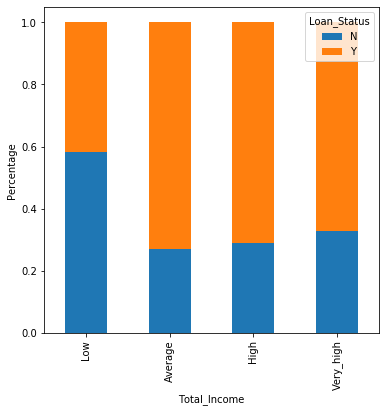

In [23]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0, 2500, 4000, 6000, 81000] 
group = ['Low', 'Average','High', 'Very_high']
train['Total_Income_bin']= pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

We can see that proportions of loans getting approved for applicants having low Total_Income is the least compared to the 
applicants with Average, High and Very_high.

Lets visualise Loan Amount variable.

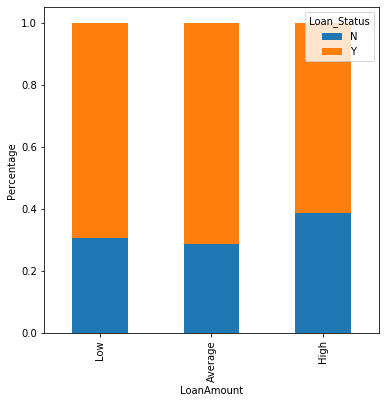

In [24]:
bins=[0, 100, 200, 700] 
group = ['Low', 'Average','High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

It can be seen that the proportions of loans approved for Low and Average Loan Amount as compared to that of High
Loan amount which supports our hypothesis in which we considered that the chances of loan approval will be high if
the loan amount is less.

Lets drop the dependents variable to 3 to make it a numerical
variable. 
We will also covert the Target variable, Loan_Status categories to 0 and 1 so that we can find its correlation with 
the numerical variables.
Also, few models like logistic regression take only numerical values as input. We will therefore replace N with 0 
and Y with 1.

In [25]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [26]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'], axis = 1)

In [27]:
train['Dependents'].replace('+3', 3, inplace=True)
test['Dependents'].replace('+3', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heatmap to visualise the correlation.
Heatmaps visualise data through variations in coloring. Variables with a darker color means theor correlation is more.

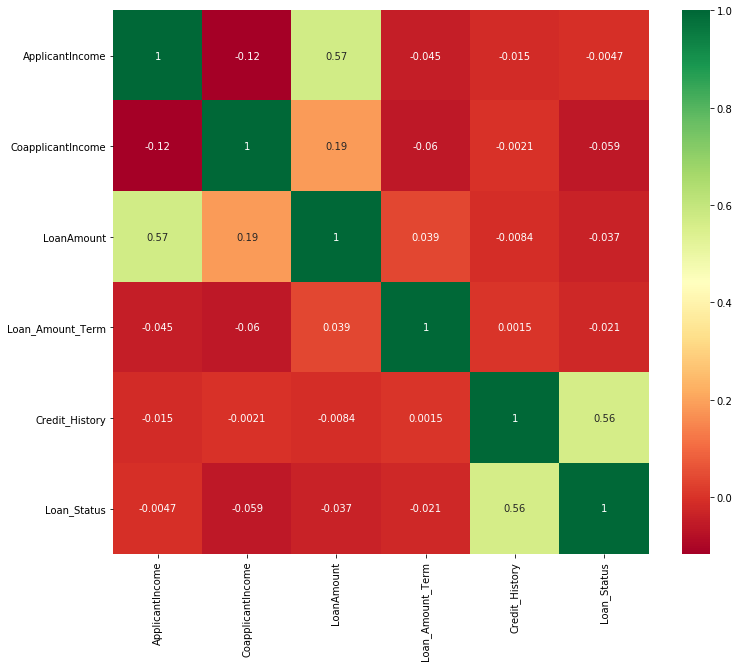

In [28]:
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).
Also LoanAmount correlates with CoapplicantIncome.

# Missing values and Outlier treatment
- After exploring all the variables in the data, we can now inpute the missing values and treat the outliers 
because missing values and outliers can have adverse effect on the final model.
- However, lets first visualise the missing values in the dataset. We will use the heatmap to visualise the missing values in each feature. 

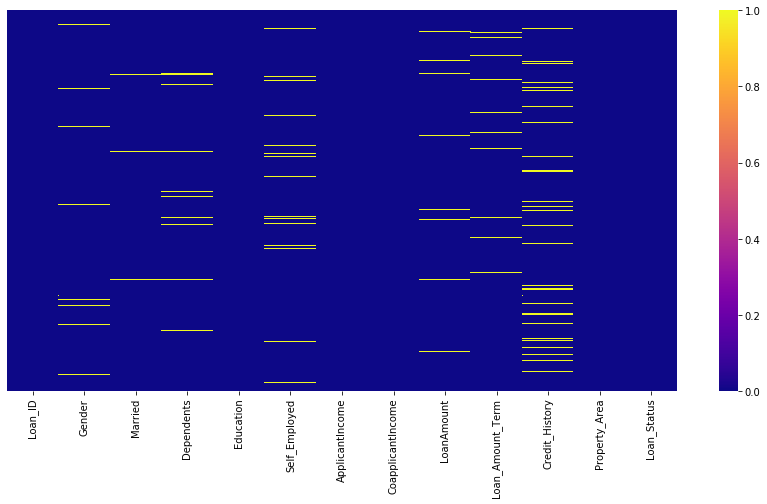

In [29]:
## visualizing missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train.isnull(), yticklabels=False,cmap='plasma');

In [30]:
#sume of missing values in each feature
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there are missing values in categorical and numerical variables.
- Categorical varibales with missing values include: Gender, Married, Self_Employed, and Credit_History. 
- Numerical variables with missing values include: LoanAmount and Loan_Amount_Term

# Imputing missing values
- We will impute categorical variables using mode.
- We will impute numerical varriables using mean or median.

Categorical variables:

In [31]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)

Numerical variables
- Lets find a way to fill the missing values in the Loan_Amount_Term. We will look at the vlaue count of the
Loan_Amount_Term variable

In [32]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that 360 is the value that repeats most times. Therefore we will replace the missing values 
using the mode.

In [33]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

For LoanAmount, we will use the median to impute the missing values since it has outliers in which case the use of 
mean doesnt apply.

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Lets check the missing values in the test dataset

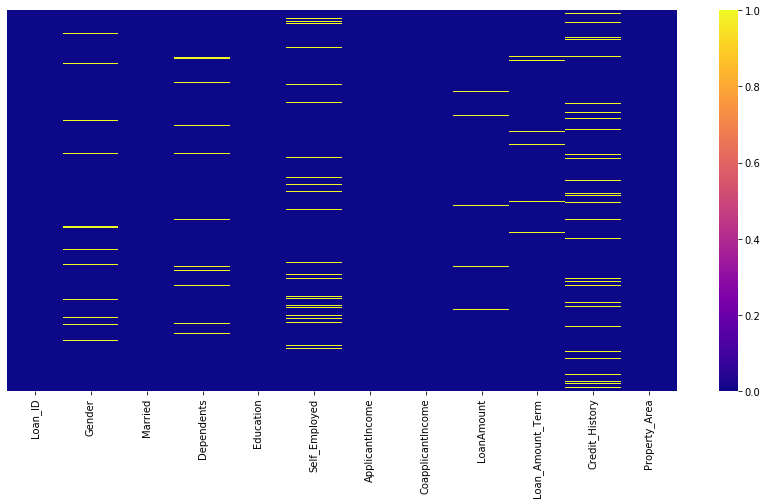

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(test.isnull(), yticklabels=False,cmap='plasma');

In [37]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Lets repeat the same process of imputing missing values as for train dataset.

Categorical Variables

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

Numerical variables

In [39]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [40]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier treatment
- As we saw in univariate analysis, LoanAmount contains outliers so we have to treat them as their presence affects
the distribution of the data. The data was skewed to the left and the right tail is longer. One way to remove the 
skewness is by using log transformation. The log transformation doesnt affect the smaller values as much but reduces
larger values. This will give distribution similar to normal distribution.

- Lets visualise the effect of log transformation. We will apply similar changes to test data.

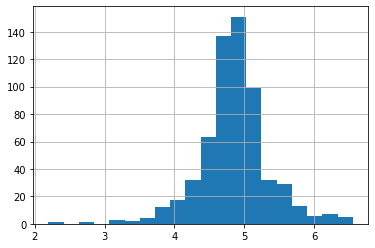

In [41]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20);

We see the distribution looks much closer to normal distribution and the extreme values have been significantly subsided.

Lets look at the test dataset

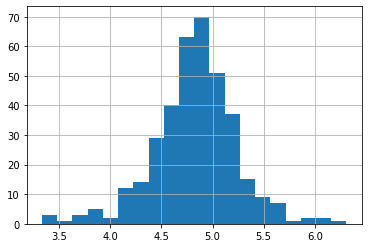

In [42]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20);

The distribution looks closer to normal distribution.

Lets build a logistic regression model and prediction for the test dataset.

# Model evaluation metrics for classification problems
- There are several evaluation techniques used in determining the performance of a classification model. These 
  techniques depend on many factors, some of which are model-dependent. The classification report shows the 
  accuracy of the model and other metrics such as precision, recall and F1.
- For this classification problem, we will apply the graphical and numerical tools in evaluating the quality 
  of the used models by applying performance metrics such as, Confusion Matrix (CM), Area Under the Curve (AUC) 
  methodologies on Receiver Operating Curve (ROC).
- Accuracy: We apply the confusion matrix which is a tabular representation of Actual and Predicted values.
- The confusion matrix has four sections, True Positive (TP), True Negative (TN), False Positive (FP) and False Negative (FN). However, there are two possible predicted classes: yes and no. The terms TP, TN, FP, FN denotes:
 -•	True Positives (TP): These are cases in which the model predicted positive, and the actual value is also positive.
 -•	True Negatives (TN): We predicted negative, and the actual value is also negative.
 -•	False Positives (FP): We predicted positive, but the actual value is negative.
 -•	False Negatives (FN): We predicted negative, but the actual value is positive.
- Precision:The measure of correctness achieved in true prediction; observations labelled as true, how many are actaully
  labelled true( TP/(TP+FP))
- Recall(Sensitivity): The measure of actual observations which are predicted correctly(TP/(TP+FN)
- Specificity: The measure of how many observations of false class are labelled correctly(TN/(TN+FP)                                                                                          
- ROC curve: Summarises the model performance by evaluationg the trade offs between True positive rate(sensitivity)
  and false postive rate (specificity)                                                                                        
- AUC: Is the perfect performance of the ROC.The higher the area under the curve, the better the prediction power.
- We will therefore apply all the above metrics for our prediction models.                                                                                          

# Model building: Part 1
- We will use logistic regression to predict the binary outcome.
- Logistic regression is an estimation of the logit function. Logit function is simply a log odds in favor of the     event.
- This function creates a s-shaped curve with a probability of estimate which is very similar to the stepwise function.

In [43]:
# Lets drop the Loan_ID so as it doesnt have an effect on Loan_Status for both train and test datasets
train=train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [44]:
# Lets drop the target variable in a train dataset and save it another dataset
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [45]:
#Encoding caterogical features for train dataset to return numerical values in 0 and 1 to make them easier to quantify
x = pd.get_dummies(X)
train = pd.get_dummies(train)
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [46]:
#Encoding caterogical features test dataset
test=pd.get_dummies(test)
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [47]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

We will then train the model on training dataset to make prediction on the test dataset. On this part we will train
the model using this part to make predictions on the validation part.

In [48]:
# we will use the train_test_split function from sklearn to divide the dataset
from sklearn.model_selection import train_test_split
#training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X,y,random_state = 0, test_size = 0.30)

In [49]:
# import Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
#fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# lets predict Loan_status for validation set
pred_cv = model.predict(X_cv)

In [51]:
# calculating the accuracy of validation set
accuracy_score(y_cv, pred_cv)

0.827027027027027

Our predictions are almost 83% accurate, ie, we have identifeid 83% of the Loan_status correctly.

In [52]:
#Lets predict Loan_status in test dataset
pred_test = model.predict(test)

In [53]:
# Lets import submission csv file which we have to submit to the solution checker
submission= pd.read_csv('/Users/asumankabugo/Desktop/sample-submission.csv')

In [54]:
# we only need the Loan_ID and the corresponding Loan_status. We will fill these with Loan_ID of the test dataset and the predictions that we made
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [55]:
#Lets convert 0 and 1 back to N and Y respectively.
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [56]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [57]:
# we then convert the submission to csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/logistic.csv')

# Logistic regression using Startified k-Folds cross validation
- This method will be spplied to check how robust our model is to unseen data.
- Stratification is the process of rearraing the data so as to ensure that each fold is good representative of 
  the whole.
- It is good method in dealing with variance and bias.
  

In [58]:
# lets import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

In [59]:
# lets make the cros validation logistic model with stratified 5 folds and make predictions for test dataset.
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7967479674796748

5 of kfold5
accuracy_score 0.7950819672131147


The mean validation turns out to be 80%.

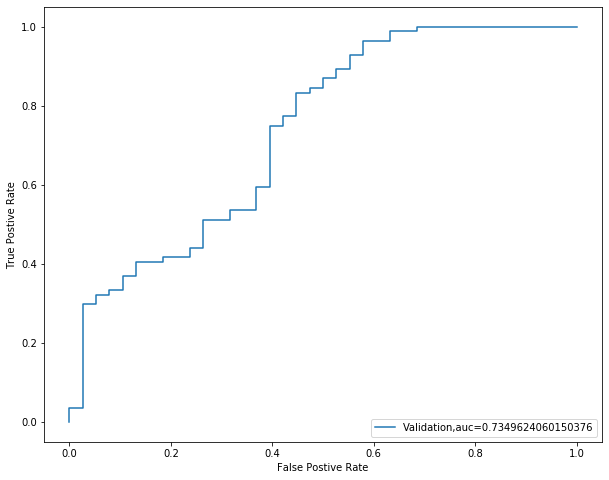

In [60]:
#lets visualise the ROC curve.
from sklearn import metrics 
fpr,tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred) 
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, label='Validation,auc=' +str(auc))
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc=4)
plt.show()

We got an AUC value of 0.73

In [61]:
#Lets convert 0 and 1 back to N and Y respectively.
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [62]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [63]:
# we then convert the submission to csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/logistic1.csv')

From this submission, we got an accuracy an accuracy of 0.77 on the leaderboard.

# Future engineering
- Based on the what we visualised, we can create new variables that might affect the target variable.
- Total_income: we will combine the ApplicantIncome and Coapplicant income
- EMI: we will calculate the EMI by taking the ratio of LoanAmount with respect to Loan_Amount_Term
- Balance_Income: This is the balance left after EMI has been paid.The idea is if the value left is high, the       chances are high that the person will pay back hence increasing the chances of loan approval. 

In [64]:
#Total_Income for both train and test datasets
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome'] + test['CoapplicantIncome']

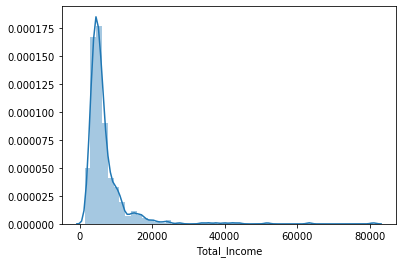

In [65]:
#distribution on Total_Income
sns.distplot(train['Total_Income']);

We can see that the data shifted to the left, ie.,the distribution is right skewed. So lets use the log transformation
to make the distribution normal.

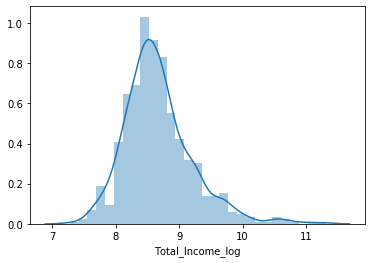

In [66]:
#apply log transformation for train datset
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

Now the distribution looks much closer to normal and effect of extreme values has been subsided

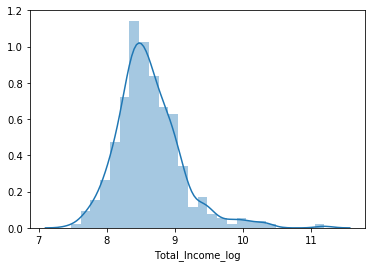

In [67]:
#apply log transformation for test dataset.
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(test['Total_Income_log']);

Now the distribution looks much closer to normal and effect of extreme values has been subsided. Lets look at EMI.

In [68]:
# creat EMI for train and test datasets
train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']= train['LoanAmount']/test['Loan_Amount_Term']

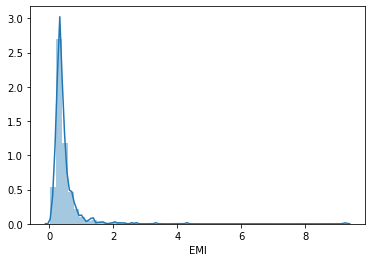

In [69]:
# distribution of EMI in train 
sns.distplot(train['EMI']);

We can see that the data shifted to the left, ie.,the distribution is right skewed. So lets use the log transformation
to make the distribution normal.

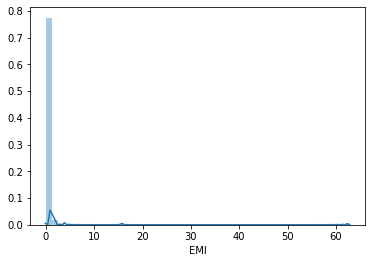

In [70]:
# distribution of EMI in test dataset
sns.distplot(test['EMI']);

We can see that the data shifted to the left, ie.,the distribution is right skewed. So lets use the log transformation to make the distribution normal.

Lets now create Balance_Income

In [71]:
# multiply with 1000 to make to make units equal
train['Balance_Income']= train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']= test['Total_Income']-(test['EMI']*1000)

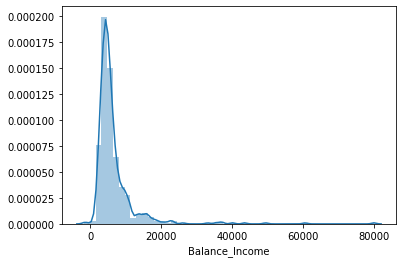

In [72]:
#distribution of Balance_Income for train
sns.distplot(train['Balance_Income']);

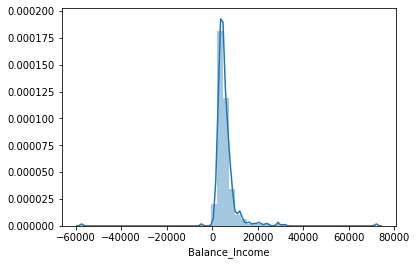

In [73]:
#distribution of Balance_Income for test dataset
sns.distplot(test['Balance_Income']);

Lets drop the features that we used to create these new features. The reason for doing this is, the correlation
between these new and old features will be bery high and logistic regression assumes that the features are not 
highly correlated. Also we want to remove the noise in the dataset, so removing correlated features will help 
in reducing noise too.

In [74]:
#dropping the old features in train and test datasets
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building ii
- After creating new features, lets continue the model building process using the following algorithms;
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [75]:
# Lets prepare the data to feed into the models
X = train.drop('Loan_Status',1)
y = train.Loan_Status

# Logistic Regression

In [76]:
# lets make the cros validation logistic model with stratified 5 folds and make predictions for test dataset
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model1 = LogisticRegression(random_state=1)
    model1.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model1.predict(test)
    pred1 = model1.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.3089430894308943

2 of kfold5
accuracy_score 0.3089430894308943

3 of kfold5
accuracy_score 0.3089430894308943

4 of kfold5
accuracy_score 0.3170731707317073

5 of kfold5
accuracy_score 0.319672131147541


In [77]:
submission['Loan_Status']=pred_test # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID']  # filling Loan_ID with test Loan_ID

In [78]:
# replacing 0 AND 1 with N and Y respectively
submission['Loan_Status'].replace(0, 'N', inplace=True) 
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [79]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [80]:
# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/logistic2.csv')

From this submission, we got an accuracy an accuracy of 0.71 on the leaderboard.We can infer, feature engineering has 
not improved our model.

# Decision Tree
- Decision tree is a type of supervised learning algorithm(having pre-defined target variable) mostly used in classification
  problems.
- Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes
  increases the homogeneity of resultant sub-nodes. In otherwords, we can say that the purity of nodes increases 
  with respect to the target variable.

In [81]:
# import tree classifier
from sklearn import tree

In [82]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model2 = tree.DecisionTreeClassifier(random_state=1)
    model2.fit(xtr, ytr)
    
    pred_test = model2.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model2.predict(test)
    pred2 = model2.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.7317073170731707

2 of kfold5
accuracy_score 0.7154471544715447

3 of kfold5
accuracy_score 0.7479674796747967

4 of kfold5
accuracy_score 0.7317073170731707

5 of kfold5
accuracy_score 0.6475409836065574


In [83]:
submission['Loan_Status']=pred_test  # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID']  # filling Loan_ID with test Loan_ID

In [84]:
# replacing 0 AND 1 with N and Y respectively
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [85]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [86]:
# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/Tree.csv')

From this submission, we got an accuracy an accuracy of 0.60 on the leaderboard which is much lesser than Logistic 
Regression model. 
Lets build another model based on Random Forest to improve our predictions.

# Random Forest
- Random Forest is a tree bootstrapping algorithm wherein a certain number of weak learners(decision trees)
  are combined to form a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a
  a decision tree model.
- Final prediction can be a function of all predictions made by all individaul learners.

In [87]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
## lets make the cros validation Random Forest model with stratified 5 folds and make predictions for test dataset.
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model3 = RandomForestClassifier(random_state=1)
    model3.fit(xtr, ytr)
    
    pred_test = model3.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model3.predict(test)
    pred3 = model3.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8292682926829268

2 of kfold5
accuracy_score 0.7967479674796748

3 of kfold5
accuracy_score 0.7886178861788617

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7622950819672131


We will try to improve the accuracy of the model by tuning the hyperparameters for this model. We will use 
grid search to get the optimised values of the hyper parameters. Grid search is a way to select the best of 
the family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators decides the number of trees that will be used in random forest model.

In [89]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [90]:
# provide range for max_depth from 1 to 20 with an interval an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [91]:
# split data
X_train, X_cv, y_train, y_cv = train_test_split(X,y,random_state = 1, test_size = 0.30)

In [92]:
# fit the grid search model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [93]:
# Estimating the optimised value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=181,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

The optimised value for the max_depth is 3 and for the n_estimators is 181. Now lets build the model using the 
optimised values.

In [94]:
## lets make the cross validation Random Forest model with stratified 5 folds and make predictions for test dataset with optimised values.
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model4 = RandomForestClassifier(random_state=1,criterion='gini',max_depth=3, n_estimators=181)
    model4.fit(xtr, ytr)
    
    pred_test = model4.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model4.predict(test)
    pred4 = model4.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8211382113821138

2 of kfold5
accuracy_score 0.8455284552845529

3 of kfold5
accuracy_score 0.8048780487804879

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


In [95]:
submission['Loan_Status']=pred_test           # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID']  # filling Loan_ID with test Loan_ID

In [96]:
# replacing 0 AND 1 with N and Y respectively
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [97]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [98]:
# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/RandomForest.csv')

From this submission, we got an accuracy an accuracy of 0.778 on the leaderboard which is better than logistic regression model.

In [99]:
#calculating feature importance
featimp = pd.Series(model4.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)

Credit_History             0.399699
Balance_Income             0.123961
Total_Income_log           0.098904
Total_Income               0.085910
EMI                        0.064468
LoanAmount_log             0.051238
Property_Area_Semiurban    0.042895
Property_Area_Rural        0.032510
Education_Graduate         0.015036
Married_No                 0.012775
Education_Not Graduate     0.011930
Married_Yes                0.011607
Gender_Female              0.008005
Dependents_0               0.007371
Dependents_1               0.007294
Dependents_2               0.007019
Gender_Male                0.005480
Self_Employed_Yes          0.003768
Self_Employed_No           0.003701
Dependents_3+              0.003350
Property_Area_Urban        0.003079
dtype: float64


No handles with labels found to put in legend.


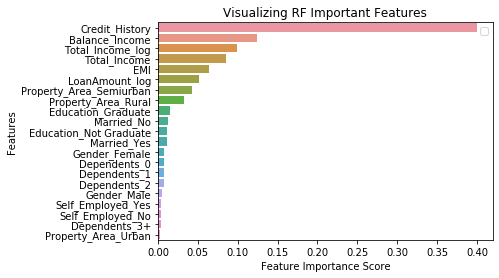

In [100]:
# Creating a bar plot
sns.barplot(x=featimp, y=featimp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing RF Important Features")
plt.legend()
plt.show();

We can see that Credit_History, Balance_Income, Total_Income_log, Total_Income, EMI. This shows feature engineering 
helped us in predicting our target variable.

# XGBOOST
- This algorithm works only with numerical variables. Here we have already replaced the categorical variables 
  with numerical variables.

In [101]:
# import XGBOOST classifier
from xgboost import XGBClassifier

In [102]:
## lets make the cross validation Random Forest model with stratified 5 folds and make predictions for test dataset
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model5 = XGBClassifier(max_depth=5, n_estimators=30 )
    model5.fit(xtr, ytr)
    
    pred_test = model3.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model5.predict(test)
    pred5 = model5.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 1.0

2 of kfold5
accuracy_score 1.0

3 of kfold5
accuracy_score 1.0

4 of kfold5
accuracy_score 1.0

5 of kfold5
accuracy_score 0.7622950819672131


In [103]:
submission['Loan_Status']=pred_test           # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID']  # filling Loan_ID with test Loan_ID

In [104]:
# replacing 0 AND 1 with N and Y respectively
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [105]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [106]:
# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('/Users/asumankabugo/Desktop/XGBOOST.csv')

From this submission, we got an accuracy an accuracy of 0.75 on the leaderboard.